In [54]:
import pandas as pd
import json

# Load the Excel file
xlsx_path = "data_case2_original.xlsx"
df_excel = pd.read_excel(xlsx_path)

# Ensure 'created' column is datetime type
df_excel["created"] = pd.to_datetime(df_excel["Created"], errors="coerce")

# Load the existing JSON data
json_path = "llama2_ticket_data.json"
with open(json_path, "r", encoding="utf-8") as f:
    data_json = json.load(f)

# Merge the 'created' column into JSON data
for i, record in enumerate(data_json):
    if i < len(df_excel):
        created_value = df_excel.loc[i, "created"]
        record["Created"] = created_value.strftime("%Y-%m-%d %H:%M:%S") if pd.notnull(created_value) else None

# Save the updated JSON data
output_path = "llama2_ticket_data_time.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(data_json, f, indent=2)

print(f"Merged 'created' values and saved to {output_path}")


Merged 'created' values and saved to llama2_ticket_data_time.json


In [55]:
import pandas as pd

df = pd.read_json("llama2_ticket_data_time.json")

# See the count of NaNs per column
print(df.isna().sum())


Description          0
Summary             31
Cause of Issue      19
Request Category     3
Comments             2
Cluster              0
Cluster_Label        3
Created              0
dtype: int64


In [56]:
df

,Description,Summary,Cause of Issue,Request Category,Comments,Cluster,Cluster_Label,Created
0,This is a description,None,None,None,072023 0659Working on it | 072023 0703This sho...,124,"reschedule, delivery, requests, schedule, cust...",2023-07-10 11:51:00
1,Sent email Friday to cancel order Yvonne Brown...,Customer canceled an order.,Request of Customer Relations,Orders - Pre delivery -> Cancelation,082024 09f58131cbb67d43c7b30d6b58d40bd077Hi sy...,84,"cancels, cancel, delivery, receipt, funeral",2023-07-10 01:38:00
2,Can you please add 25 cases of the following t...,Customer wants to add 25 cases of mangoes to t...,Request of Customer Relations,Orders - Pre delivery -> Produce Request,052024 12f58131cbb67d43c7b30d6b58d40bd077Hi sp...,159,"mangoes, mangos, tomatoes, order, peaches",2023-07-07 06:55:00
3,Please add the following to my order 35 cases ...,Customer wants to add 35 cases of a product wi...,Request of Customer Relations,Orders - Pre delivery -> Edit Order Items,052024 11f58131cbb67d43c7b30d6b58d40bd077Hi se...,96,"items, order, addition, code, customer",2024-08-14 09:57:00
4,Good morning Can you please add the following ...,Customer wants to add 25 cases of mangoes to t...,Other,Orders - Pre delivery -> Produce Request,052024 09f58131cbb67d43c7b30d6b58d40bd077Hi sp...,159,"mangoes, mangos, tomatoes, order, peaches",2024-05-07 12:17:00
...,...,...,...,...,...,...,...,...
776,I would like to edit our order number for 56 C...,Customer wants to edit their order and change ...,Request of Customer Relations,Orders - Pre delivery -> Edit Order Items,042024 01f58131cbb67d43c7b30d6b58d40bd077Hi eb...,100,"invoice, billing, order, existing, edit",2024-09-23 09:08:00
777,My orders saved as a credit card order rather ...,Customer wants to modify their order and add p...,Request of Customer Relations,Orders - Pre delivery -> Edit Order Items,052024 10f58131cbb67d43c7b30d6b58d40bd077Hi eb...,82,"backorder, order, items, customer, requests",2024-11-25 07:49:00
778,Could you please add whatever produce is avail...,Customer wants to add whatever produce is avai...,Request of Customer Relations,Orders - Pre delivery -> Produce Request,072024 11f58131cbb67d43c7b30d6b58d40bd077Hi eb...,113,"restaurant, produce, menu, items, order",2025-02-11 08:38:00
779,Number 3016484884 Hello 7th Adventist Church j...,Customer is inquiring about the availability o...,Request of Customer Relations,Menu -> General Questions,112024 118bb74f6de1974782a07e1b151e7b4800 | 11...,3,"thanksgiving, turkeys, turkey, delivery, requests",2024-12-10 03:22:00


In [57]:
df["Summary"] = df["Summary"].fillna("No summary available")
df["Cause of Issue"] = df["Cause of Issue"].fillna("Unknown")
df["Request Category"] = df["Request Category"].fillna("Uncategorized")
df["Comments"] = df["Comments"].fillna("")
df["Cluster_Label"] = df["Cluster_Label"].fillna("Unlabeled")


In [58]:
print(df.isna().sum())

Description         0
Summary             0
Cause of Issue      0
Request Category    0
Comments            0
Cluster             0
Cluster_Label       0
Created             0
dtype: int64


In [59]:
import pandas as pd

if pd.api.types.is_numeric_dtype(df["Created"]):
    df["Created"] = pd.to_datetime(df["Created"], unit='ms', errors='coerce')
else:
    df["Created"] = pd.to_datetime(df["Created"], errors='coerce')

# Convert 'Created' to datetime
df["Created"] = pd.to_datetime(df["Created"], errors="coerce")

# Create new time-based attributes
df["Year"] = df["Created"].dt.year
df["Month"] = df["Created"].dt.month
df["Day"] = df["Created"].dt.day
df["Time"] = df["Created"].dt.time
df["Weekday"] = df["Created"].dt.day_name()
df["Created"] = df["Created"].dt.strftime("%Y-%m-%dT%H:%M:%S")

# Optional: Save the updated file
df.to_json("llama2_ticket_data_time.json", orient="records", indent=2)

print("✅ Time features created and saved.")


✅ Time features created and saved.


In [60]:
df

,Description,Summary,Cause of Issue,Request Category,Comments,Cluster,Cluster_Label,Created,Year,Month,Day,Time,Weekday
0,This is a description,No summary available,Unknown,Uncategorized,072023 0659Working on it | 072023 0703This sho...,124,"reschedule, delivery, requests, schedule, cust...",2023-07-10T11:51:00,2023,7,10,11:51:00,Monday
1,Sent email Friday to cancel order Yvonne Brown...,Customer canceled an order.,Request of Customer Relations,Orders - Pre delivery -> Cancelation,082024 09f58131cbb67d43c7b30d6b58d40bd077Hi sy...,84,"cancels, cancel, delivery, receipt, funeral",2023-07-10T01:38:00,2023,7,10,01:38:00,Monday
2,Can you please add 25 cases of the following t...,Customer wants to add 25 cases of mangoes to t...,Request of Customer Relations,Orders - Pre delivery -> Produce Request,052024 12f58131cbb67d43c7b30d6b58d40bd077Hi sp...,159,"mangoes, mangos, tomatoes, order, peaches",2023-07-07T06:55:00,2023,7,7,06:55:00,Friday
3,Please add the following to my order 35 cases ...,Customer wants to add 35 cases of a product wi...,Request of Customer Relations,Orders - Pre delivery -> Edit Order Items,052024 11f58131cbb67d43c7b30d6b58d40bd077Hi se...,96,"items, order, addition, code, customer",2024-08-14T09:57:00,2024,8,14,09:57:00,Wednesday
4,Good morning Can you please add the following ...,Customer wants to add 25 cases of mangoes to t...,Other,Orders - Pre delivery -> Produce Request,052024 09f58131cbb67d43c7b30d6b58d40bd077Hi sp...,159,"mangoes, mangos, tomatoes, order, peaches",2024-05-07T12:17:00,2024,5,7,12:17:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,I would like to edit our order number for 56 C...,Customer wants to edit their order and change ...,Request of Customer Relations,Orders - Pre delivery -> Edit Order Items,042024 01f58131cbb67d43c7b30d6b58d40bd077Hi eb...,100,"invoice, billing, order, existing, edit",2024-09-23T09:08:00,2024,9,23,09:08:00,Monday
777,My orders saved as a credit card order rather ...,Customer wants to modify their order and add p...,Request of Customer Relations,Orders - Pre delivery -> Edit Order Items,052024 10f58131cbb67d43c7b30d6b58d40bd077Hi eb...,82,"backorder, order, items, customer, requests",2024-11-25T07:49:00,2024,11,25,07:49:00,Monday
778,Could you please add whatever produce is avail...,Customer wants to add whatever produce is avai...,Request of Customer Relations,Orders - Pre delivery -> Produce Request,072024 11f58131cbb67d43c7b30d6b58d40bd077Hi eb...,113,"restaurant, produce, menu, items, order",2025-02-11T08:38:00,2025,2,11,08:38:00,Tuesday
779,Number 3016484884 Hello 7th Adventist Church j...,Customer is inquiring about the availability o...,Request of Customer Relations,Menu -> General Questions,112024 118bb74f6de1974782a07e1b151e7b4800 | 11...,3,"thanksgiving, turkeys, turkey, delivery, requests",2024-12-10T03:22:00,2024,12,10,03:22:00,Tuesday


📊 1. Monthly Volume Trend (Are tickets increasing? Seasonal peaks?)
🎯 Goal: Reveal how overall ticket load changes month-to-month.

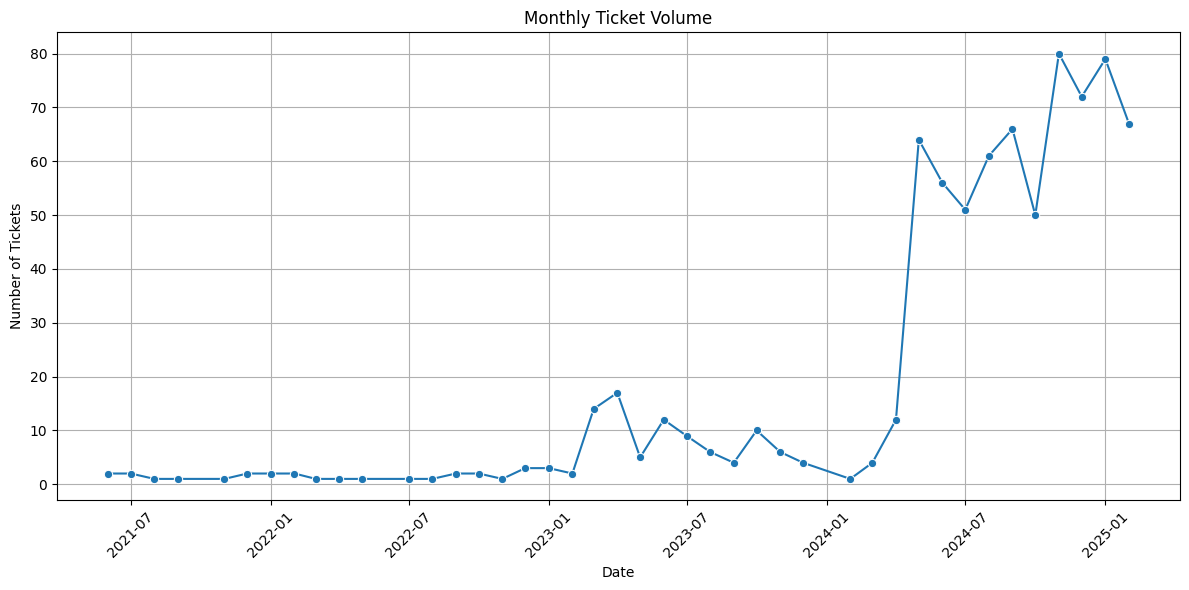

In [61]:
# Group by Year & Month
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(DAY=1))
monthly_volume = df.groupby("Date").size().reset_index(name="Ticket Count")

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_volume, x="Date", y="Ticket Count", marker="o")
plt.title("Monthly Ticket Volume")
plt.ylabel("Number of Tickets")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📅 2. Weekly Pattern by Weekday (When is support busiest?)
🎯 Goal: Show which days of the week partners most often need support.

/var/folders/dc/qbgzhv7x48b5f7bp_vqfjlfr0000gn/T/ipykernel_37852/3042314714.py:12: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/Users/berkayyenilmez/.pyenv/versions/3.10.5/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


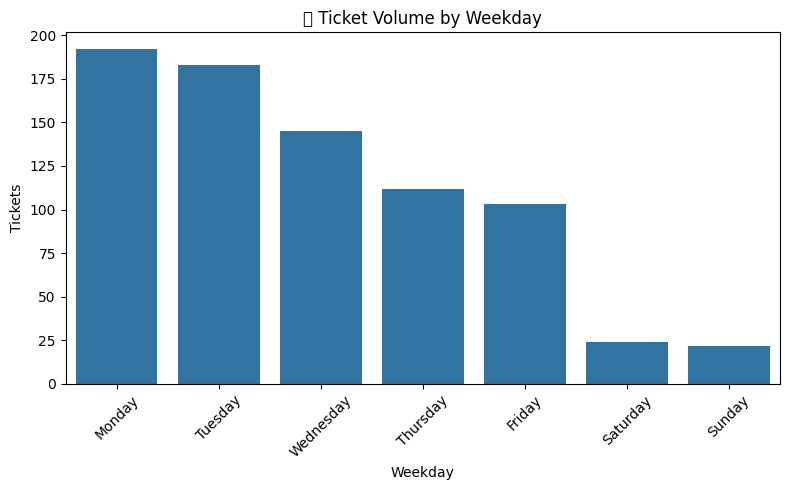

In [62]:
weekday_counts = df["Weekday"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()
weekday_counts.columns = ["Weekday", "Ticket Count"]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=weekday_counts, x="Weekday", y="Ticket Count")
plt.title("📅 Ticket Volume by Weekday")
plt.ylabel("Tickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 3. Most Common Request Categories Over Time
🎯 Goal: Understand what types of requests are increasing or dropping.

/var/folders/dc/qbgzhv7x48b5f7bp_vqfjlfr0000gn/T/ipykernel_37852/4027657574.py:12: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
/Users/berkayyenilmez/.pyenv/versions/3.10.5/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


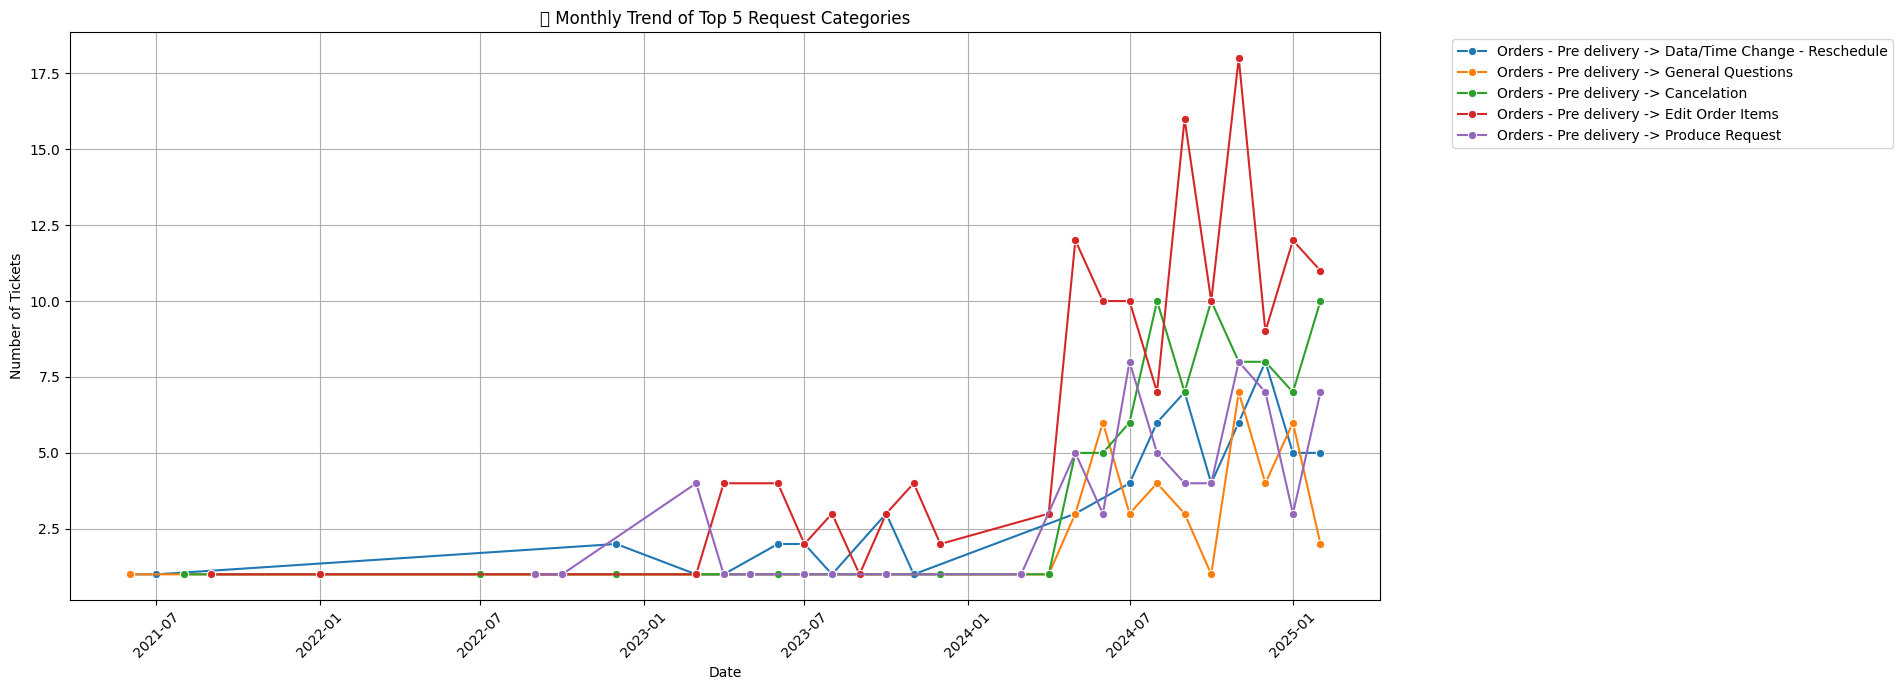

In [63]:
top_cats = df["Request Category"].value_counts().head(5).index
filtered = df[df["Request Category"].isin(top_cats)]

cat_monthly = filtered.groupby(["Date", "Request Category"]).size().reset_index(name="Count")

plt.figure(figsize=(14,7))
sns.lineplot(data=cat_monthly, x="Date", y="Count", hue="Request Category", marker="o")
plt.title("📌 Monthly Trend of Top 5 Request Categories")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


💬 4. Word Frequency in Summaries (High-level concerns)
🎯 Goal: Identify recurring topics that are not captured by Jira categories.

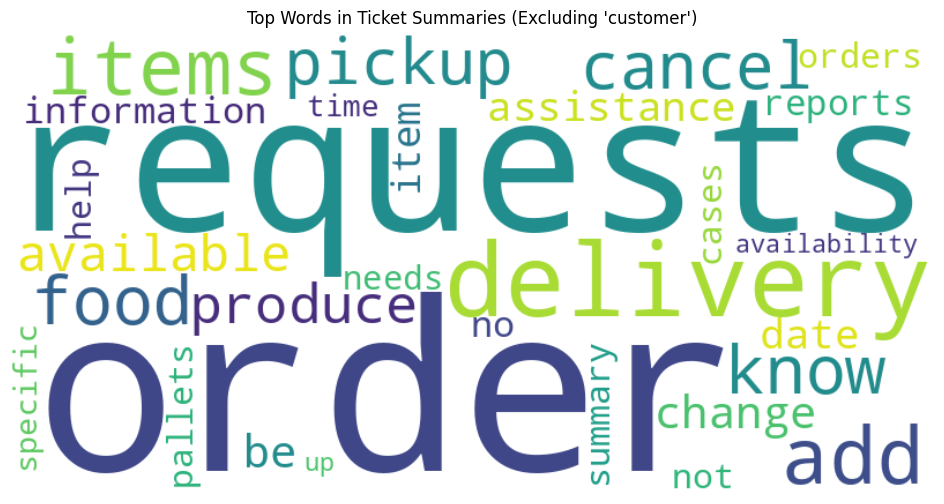

In [64]:
from collections import Counter
from wordcloud import WordCloud

# Clean and split words
summaries = df["Summary"].dropna().astype(str).str.lower().str.replace("[.,]", "", regex=True)
words = " ".join(summaries.tolist()).split()

# Remove generic stopwords and 'customer'
custom_stopwords = {
    "customer", "the", "a", "to", "of", "and", "is", "for", "in", "on", "with", 
    "this", "that", "an", "i", "we", "you", "your", "hi", "thank", "please", "their", "wants", "about", "from", 
    "if", "they", "due"
}
filtered_words = [word for word in words if word not in custom_stopwords]

# Count top 30 words
word_counts = Counter(filtered_words)
top_words = dict(word_counts.most_common(30))

# Word Cloud
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_words)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top Words in Ticket Summaries (Excluding 'customer')")
plt.show()


/var/folders/dc/qbgzhv7x48b5f7bp_vqfjlfr0000gn/T/ipykernel_37852/3348091402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x="Frequency", y="Word", palette="viridis")


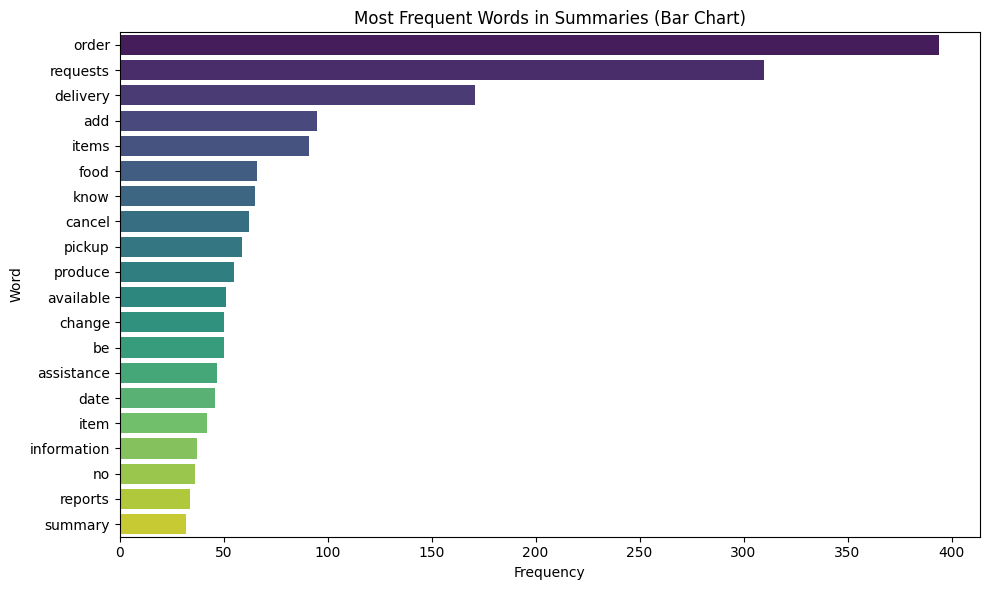

In [65]:
top_words_df = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words_df, x="Frequency", y="Word", palette="viridis")
plt.title("Most Frequent Words in Summaries (Bar Chart)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

5. 📅 Workload Distribution by Hour
Extract Hour from the Time column and visualize support load per hour.
!!! Problem: it only contains 12-hour format times without AM/PM indicators

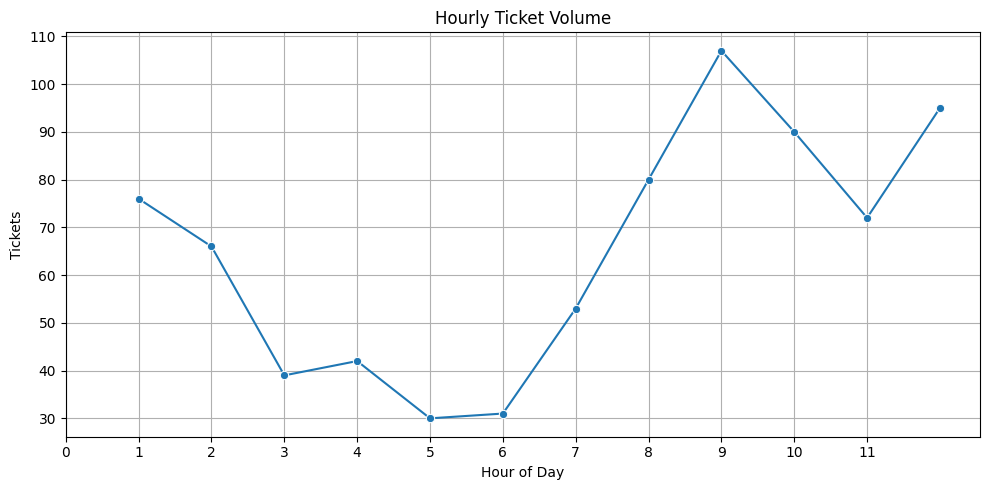

In [66]:
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour
hourly_counts = df.groupby("Hour").size().reset_index(name="Ticket Count")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_counts, x="Hour", y="Ticket Count", marker="o")
plt.title("Hourly Ticket Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Tickets")
plt.grid(True)
plt.xticks(range(0, 12))
plt.tight_layout()
plt.show()


6. 📊 Weekly Heatmap (Time vs Weekday)

/var/folders/dc/qbgzhv7x48b5f7bp_vqfjlfr0000gn/T/ipykernel_37852/49544400.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/berkayyenilmez/.pyenv/versions/3.10.5/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


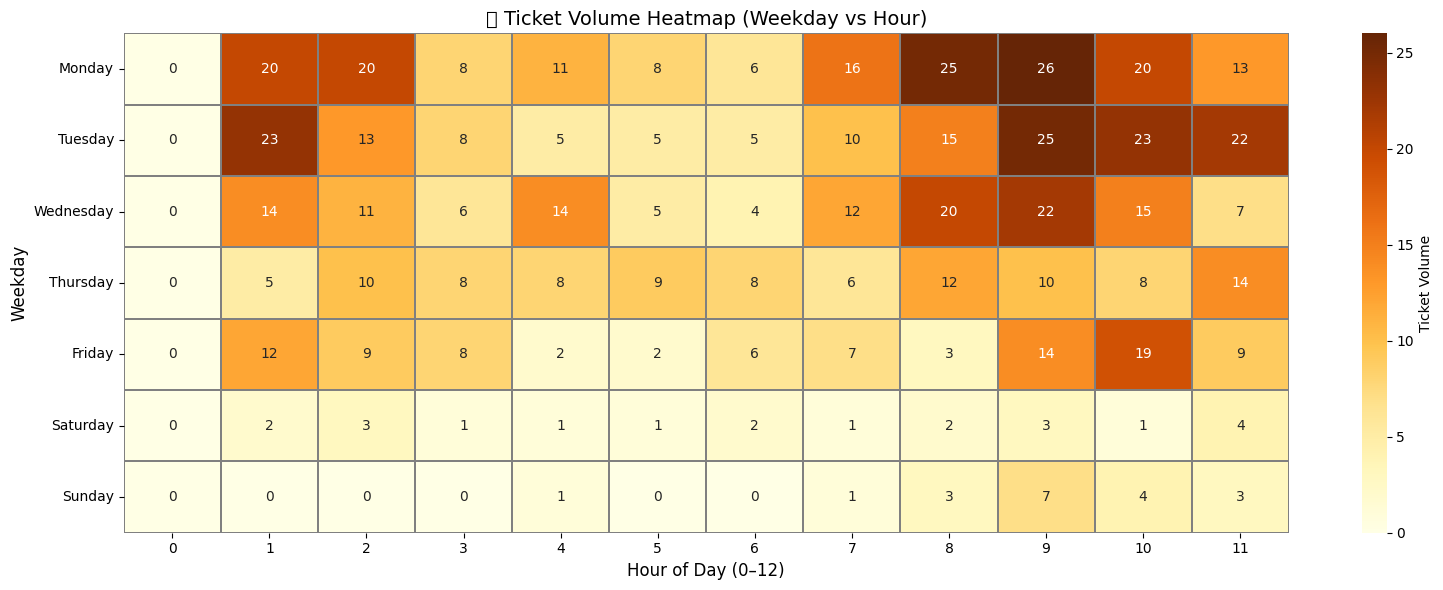

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort weekdays manually for correct order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Weekday"] = pd.Categorical(df["Weekday"], categories=weekday_order, ordered=True)

# Pivot table for heatmap (sorted & clean)
pivot = df.pivot_table(index="Weekday", columns="Hour", values="Summary", aggfunc="count").fillna(0)
pivot = pivot.reindex(weekday_order)  # ensure correct weekday order
pivot = pivot.reindex(columns=range(0, 12), fill_value=0)  # pad hours to 0–23

# Improved visualization
plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap="YlOrBr", linewidths=0.3, linecolor='gray', annot=True, fmt=".0f", cbar_kws={'label': 'Ticket Volume'})

plt.title("📊 Ticket Volume Heatmap (Weekday vs Hour)", fontsize=14)
plt.xlabel("Hour of Day (0–12)", fontsize=12)
plt.ylabel("Weekday", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## 7. 🧮 Trend of Cancellations or Modifications
Track how often keywords like "cancel", "change", "edit", "reschedule" appear over time.

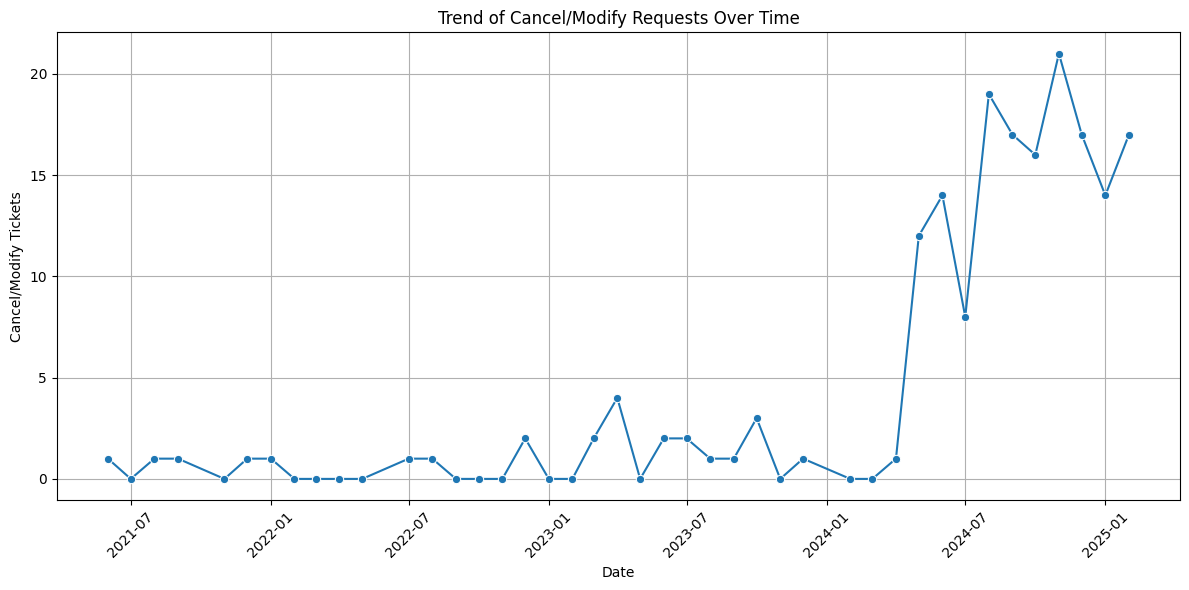

In [68]:
df["Summary_Lower"] = df["Summary"].fillna("").str.lower()
df["Cancel_Modify_Flag"] = df["Summary_Lower"].apply(
    lambda x: any(k in x for k in ["cancel", "reschedule", "change", "edit"])
)

cancel_monthly = df.groupby("Date")["Cancel_Modify_Flag"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cancel_monthly, x="Date", y="Cancel_Modify_Flag", marker="o")
plt.title("Trend of Cancel/Modify Requests Over Time")
plt.ylabel("Cancel/Modify Tickets")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
